In [1]:
#          ######################################################################################################
#          #                                          IN THE NAME OF ALLAH                                      #
#          #          STEEL-CONCRETE COMPOSITE PLATE GIRDERS BRIDGE SUPERSTRUCTURE MOVABLE DISPLACEMENT         #
#          #----------------------------------------------------------------------------------------------------#
#          #                          THIS PROGRAM WRITTEN BY SALAR DELAVAR QASHQAI                             #
#          #                               EMAIL: salar.d.ghashghaei@gmail.com                                  #
#          ######################################################################################################

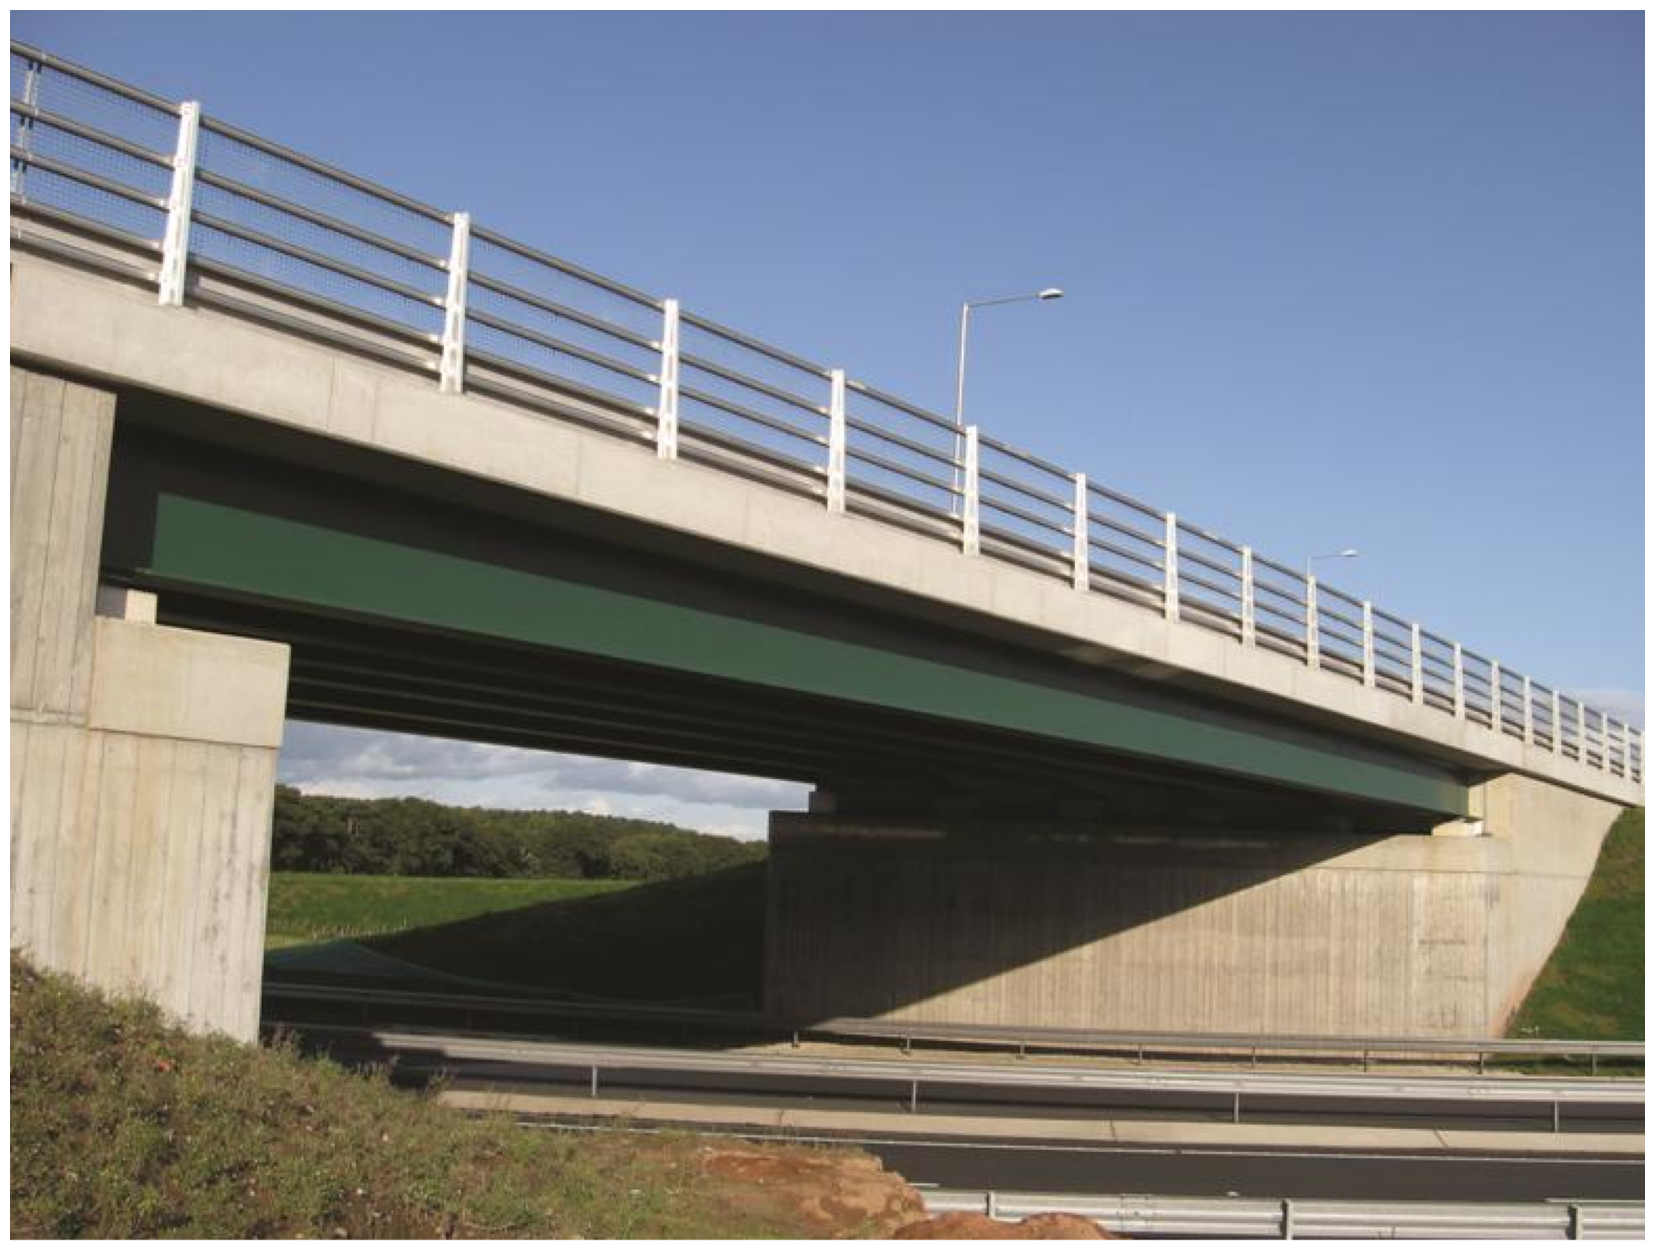

In [2]:
# Load the image
def PLOT_IMAGE(image):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    image = mpimg.imread(image_path)

    # Display the image
    plt.figure(figsize=(30, 16))
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
image_path = 'OPENSEES_SINGLE_SPAN_SIMPLY_SUPPORTED_COMPOSITE_BRIDGE_00.png'    
PLOT_IMAGE(image_path)

In [3]:
# BRIDGE IMAGES AND DATA
'https://www.steelconstruction.info/A1_Peterborough_to_Blyth'
# BOOK: Finite Element Analysis and Design of Steel and Steel–Concrete Composite Bridges
'https://www.sciencedirect.com/book/9780124172470/finite-element-analysis-and-design-of-steel-and-steel-concrete-composite-bridges'
# BOOK: Steel-concrete composite bridge design guide
'https://www.nzta.govt.nz/assets/resources/research/reports/525/docs/525.pdf' 

'https://www.nzta.govt.nz/assets/resources/research/reports/525/docs/525.pdf'

In [4]:
# pip install openseespy
# pip install --upgrade openseespy
# pip install opsvis

In [5]:
#import the os module
import os
import time
import numpy as np
import openseespy.opensees as op
import opsvis as opsv
import matplotlib.pyplot as plt

In [7]:
#to create a directory at specified path with name "Data"
os.mkdir('C:\\OPENSEESPY_SALAR')

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'C:\\OPENSEESPY_SALAR'

In [8]:
FOLDER_NAME = 'COMPOSITE_BRIDGE_MOVING_DISP'
dir = f"C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\"
if not os.path.exists(dir):
    os.makedirs(dir)

In [9]:
# OUTPUT DATA ADDRESS:
SALAR_DIR = f'C://OPENSEESPY_SALAR//{FOLDER_NAME}//';

In [10]:
## DELETE ALL FILES IN DIRECTORY 
def DELETE_FOLDER_CONTANTS(folder_path):
    import os
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            if os.path.isfile(file_path) or os.path.islink(file_path):
                os.unlink(file_path)
        except Exception as e:
            print(f"Failed to delete {file_path}. Reason: {e}")
    print("Deletion done")
   
FOLDER_PATH = f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}'  # Specify the folder path
#DELETE_FOLDER_CONTANTS(FOLDER_PATH)   

In [11]:
def HISROGRAM_BOXPLOT(X, HISTO_COLOR, LABEL):
    import numpy as np
    import matplotlib.pyplot as plt
    X = np.array(X)
    print("-------------------------")
    from scipy.stats import skew, kurtosis
    MINIMUM = np.min(X)
    MAXIMUM = np.max(X)
    #MODE = max(set(X), key=list(X).count)
    MEDIAN = np.quantile(X, .50)#q2
    MEAN = np.mean(X)
    STD = np.std(X)
    q1 = np.quantile(X, .25)
    q3 = np.quantile(X, .75)
    SKEW = skew(X)
    KURT = kurtosis(X)
    #SKEW = (MEAN - MODE) / STD
    #KURT = (np.mean((X - MEAN)**4) / STD**4)
    # Estimate confidence intervals of the output variable
    lower_bound = np.quantile(X, .05)
    upper_bound = np.quantile(X, .95)
    print("Box-Chart Datas: ")
    print(f'Minimum: {MINIMUM:.4f}')
    print(f'First quartile: {q1:.4f}')
    #print(f'Mode: {MODE:.4f}')
    print(f'Median: {MEDIAN:.4f}')
    print(f'Mean: {MEAN:.4f}')
    print(f'Std: {STD:.4f}')
    print(f'Third quartile: {q3:.4f}')
    print(f'Maximum: {MAXIMUM :.4f}')
    print(f'Skewness: {skew(X) :.4f}')
    print(f'kurtosis: {kurtosis(X) :.4f}')
    print(f"90% Confidence Interval: ({lower_bound:.4f}, {upper_bound:.4f})")
    print("-------------------------")

    plt.figure(figsize=(10,6))
    # Plot histogram of data
    count, bins, ignored = plt.hist(X, bins=100, color=HISTO_COLOR, density=True, align='mid')#, edgecolor="black"
    
    # Plot lognormal PDF
    x = np.linspace(min(bins), max(bins), 10000)
    pdf = (np.exp(-(x - MEAN)**2 / (2 * STD**2)) / (STD * np.sqrt(2 * np.pi)))
    plt.plot(x, pdf, linewidth=2, color='r', label="Normal PDF")
    
    # Plot vertical lines for risk measures
    plt.axvline(q1, color="black", linestyle="--", label=f"Quantile 0.25: {q1:.4f}")
    plt.axvline(MEDIAN, color="green", linestyle="--", label=f"Median: {MEDIAN:.4f}")
    plt.axvline(q3, color="black", linestyle="--", label=f"Quantile 0.75: {q3:.4f}")
    #plt.axvline(MODE, color="purple", linestyle="--", label=f"Mode: {MODE:.4f}")
    plt.axvline(MEAN, color="red", linestyle="--", label=f"Mean: {MEAN:.4f}")
    plt.axvline(MEAN-STD, color="blue", linestyle="--", label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.axvline(MEAN+STD, color="blue", linestyle="--", label=f"Mean+Std: {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Frequency")
    prob = np.sum(X > 0) / len(X)
    plt.title(f"Histogram - Probability of Positive {LABEL} is {100*prob:.2f} %")
    plt.legend()
    #plt.grid()
    plt.show()

    #Plot boxplot with outliers
    plt.figure(figsize=(10,6))
    plt.boxplot(X, vert=0)
    # Write the quartile data on the chart
    plt.text(q1, 1.05, f" Q1: {q1:.4f}")
    plt.text(MEDIAN, 1.1, f" Q2: {MEDIAN:.4f}")
    plt.text(q3, 1.05, f" Q3: {q3:.4f}")
    #plt.text(MODE, 1.15, f" Mode: {MODE:.4f}")
    
    #plt.text(MEAN, 0.9, f" Mean: {MEAN:.4f}")
    #plt.text(MEAN-STD, 0.9, f" Mean-Std: {MEAN-STD:.4f}")
    #plt.text(MEAN+STD, 0.9, f" Mean+Std: {MEAN+STD:.4f}")
    plt.scatter(MEAN, 1, color="red", marker="+", s=200, label=f"Mean: {MEAN:.4f}")
    plt.scatter(MEAN-STD, 1, color="green", marker="X", s=200, label=f"Mean-Std: {MEAN-STD:.4f}")
    plt.scatter(MEAN+STD, 1, color="blue", marker="*", s=200, label=f"Mean+Std:  {MEAN+STD:.4f}")
    plt.xlabel(LABEL)
    plt.ylabel("Data")
    plt.title(f"Boxplot of {LABEL}")
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------    
def HISTOGRAM_BOXPLOT_PLOTLY( DATA, XLABEL='X', TITLE='A', COLOR='cyan'):
    # Plotting histogram and boxplot
    import plotly.express as px
    fig = px.histogram(x=DATA, marginal="box", color_discrete_sequence=[COLOR])
    fig.update_layout(title=TITLE, xaxis_title=XLABEL, yaxis_title="Frequency")
    fig.show()     
# -----------------------------------------------
def PLOT_TIME_HIS(x, xlabel, y1, y1label, y2, y2label, y3, y3label, y4, y4label, Z, LOGX, LOGY):
    ## PLOT THE DATA
    import numpy as np
    import matplotlib.pyplot as plt
    # Define colors for each dataset
    colors = ['b', 'g', 'r', 'c']

    # Create subplots based on the value of Z
    fig, axs = plt.subplots(Z, 1, figsize=(14, 14))

    # Plot each dataset with a different color
    for i, y_data in enumerate([y1, y2, y3, y4][:Z]):
        axs[i].plot(x, y_data, color=colors[i])
        axs[i].set_title(f"{[y1label, y2label, y3label, y4label][i]} - MAX ABS: {np.max(np.abs(y_data)):.6e}")
        axs[i].set_xlabel(xlabel)
        #axs[i].set_ylabel()
        axs[i].grid()
        if LOGX == 1:
            axs[i].semilogx()
        if LOGY == 1:
            axs[i].semilogy()    

    # Adjust layout
    plt.tight_layout()
    plt.show()  
# -----------------------------------------------    
def MAXABS_FUN(DATA_FILE, COLUMN, I, J, Z):
    import numpy as np
    # Read and process displacement data
    if Z == 1:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))
    if Z == 2:
        NameFiles = DATA_FILE
        filename = f"{NameFiles}_{I}_{J}.txt"
        D = np.loadtxt(filename)
        #print(D)
        MAXABS = np.max(np.abs([D[:, COLUMN]]))    
    #print("MAX. ABS. :", MAXABS)
    return MAXABS
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, XLABEL, YLABEL, TITLE, COLOR, Z):
    import matplotlib.pyplot as plt
    if Z == 1:
        # Plot 1 line
        plt.figure(figsize=(12, 8))
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend(['curve', 'bilinear fitted'], loc='lower right')
        plt.grid(True)
        plt.show()
# -----------------------------------------------
def OUTPUT_SECOND_COLUMN(FOLDER, X, COLUMN, I, Z):
    import numpy as np
    # Time History
    if Z == 1:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]
    if Z == 2:
        filename = f"C:\\OPENSEESPY_SALAR\\{FOLDER}\\{X}_{I}.txt"
        data_collected = np.loadtxt(filename)
        X = data_collected[:, COLUMN]    
    return X 
# -----------------------------------------------
def BILNEAR_CURVE(Cur, Mom, SLOPE_NODE):
    import numpy as np
    # bilinear fitting
    SIZE = len(Mom)
    hh = np.zeros(SIZE-1)
    Aa = np.zeros(SIZE-1)
    for i in range(SIZE-1):
        hh[i] = Cur[i+1] - Cur[i]
        Aa[i] = (Mom[i] + Mom[i+1]) * 0.5 * hh[i]

    Area = sum(Aa)
    k0 = Mom[SLOPE_NODE] / Cur[SLOPE_NODE]
    fiy = (Mom[i+1] * max(Cur) * 0.5 - Area) / (Mom[i+1] * 0.5 - k0 * max(Cur) * 0.5)
    My = k0 * fiy
    X = np.array([0, fiy, max(Cur)])
    Y = np.array([0, My, Mom[i+1]])
    
    # EI and Ductility_Rito
    Elastic_ST = Y[1] / X[1]
    Plastic_ST = Y[2] / X[2]
    Tangent_ST = (Y[2] - Y[1]) / (X[2] - X[1])
    Ductility_Rito = X[2] / X[1]
    Over_Strength_Factor = Y[2] / Y[1]
    """
    # MOMENT-CURVAVTURE ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('  Curvature    Moment')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+--------------------------------------------------------------------+')
    print(f' Elastic Flextural Rigidity :             {Elastic_EI:.2f}')
    print(f' Plastic Flextural Rigidity :             {Plastic_EI:.2f}')
    print(f' Tangent Flextural Rigidity :             {Tangent_EI:.2f}')
    print(f' Section Ductility Ratio :                {Ductility_Rito:.2f}')
    print(f' Section Over Stregth Factor:             {Over_Stregth_Factor:.2f}')
    print('+--------------------------------------------------------------------+')
    """
    """
    # PUSHOVER ANALYSIS
    print('+==========================+')
    print('=   Analysis curve fitted =')
    print('     Disp       Baser Shear')
    print('----------------------------')
    print(np.column_stack((X.T, Y.T)))
    print('+==========================+')
    print('+----------------------------------------------------+')
    print(f' Structure Elastic Stiffness :     {Elastic_ST:.2f}')
    print(f' Structure Plastic Stiffness :     {Plastic_ST:.2f}')
    print(f' Structure Tangent Stiffness :     {Tangent_ST:.2f}')
    print(f' Structure Ductility Ratio :       {Ductility_Rito:.2f}')
    print(f' Structure Over Strength Factor:   {Over_Strength_Factor:.2f}')
    print('+----------------------------------------------------+')
    """
    return X, Y, Elastic_ST, Plastic_ST, Tangent_ST, Ductility_Rito, Over_Strength_Factor
# -----------------------------------------------
def PLOT_2D(X, Y, Xfit, Yfit, X2, Y2, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z):
    import matplotlib.pyplot as plt
    #plt.figure(figsize=(12, 8))
    if Z == 1:
        # Plot 1 line
        plt.plot(X, Y,color=COLOR)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.title(TITLE)
        plt.grid(True)
        plt.show()
    if Z == 2:
        # Plot 2 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02], loc='lower right')
        plt.grid(True)
        plt.show()
    if Z == 3:
        # Plot 3 lines
        plt.plot(X, Y, Xfit, Yfit, 'r--', X2, Y2, 'g-*', linewidth=3)
        plt.title(TITLE)
        plt.xlabel(XLABEL)
        plt.ylabel(YLABEL)
        plt.legend([LEGEND01, LEGEND02, LEGEND03], loc='lower right')
        plt.grid(True)
        plt.show() 
# -----------------------------------------------
def PLOT3D(X, Y, Z, XLABEL, YLABEL, ZLABEL, TITLE):
    import plotly.graph_objects as go
    # Create a 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', marker=dict(size=5, color=Z))])
    fig.update_layout(scene=dict(xaxis_title=XLABEL, yaxis_title=YLABEL, zaxis_title=ZLABEL), title=TITLE)
    fig.show()
# -----------------------------------------------     
# Create a scatter plot
def PLOT_SCATTER(X, Y , XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import matplotlib.pyplot as plt
    # Calculate linear regression parameters
    import numpy as np
    coefficients = np.polyfit(X, Y, ORDER)
    if ORDER == 1:
        a, b = coefficients
    if ORDER == 2:
        a, b, c = coefficients    
    if ORDER == 3:
        a, b, c, d = coefficients   
    if ORDER == 4:
        a, b, c, d, e = coefficients  
    if ORDER == 5:
        a, b, c, d, e, f = coefficients  
    if ORDER == 6:
        a, b, c, d, e, f, I = coefficients   
    if ORDER == 7:
        a, b, c, d, e, f, I, J = coefficients     
    y = [];yy = [];
    for i in range(len(X)):
        if ORDER == 1:
            y.append(a * X[i] + b)
        if ORDER == 2:
            y.append(a * X[i]**2 + b * X[i] + c)
        if ORDER == 3:
            y.append(a * X[i]**3 + b * X[i]**2 + c * X[i] + d)    
        if ORDER == 4:
            y.append(a * X[i]**4 + b * X[i]**3 + c * X[i]**2 + d * X[i] + e)  
        if ORDER == 5:
            y.append(a * X[i]**5 + b * X[i]**4 + c * X[i]**3 + d * X[i]**2 + e * X[i] + f)    
        if ORDER == 6:
            y.append(a * X[i]**6 + b * X[i]**5 + c * X[i]**4 + d * X[i]**3 + e * X[i]**2 + f * X[i] + I)     
        if ORDER == 7:
            y.append(a * X[i]**7 + b * X[i]**6 + c * X[i]**5 + d * X[i]**4 + e * X[i]**3 + f * X[i]**2 + I * X[i] + J)     
        yy.append(Y[i] - y[-1])
    y = np.array(y)    
    yy = np.array(yy) 
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    # Calculate RSS
    RSS = np.sum(yy ** 2)
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    #print(f"R-squared value: {R_squared:.4f}")
    plt.figure(figsize=(10,6))
    plt.scatter(X, Y, color=COLOR, marker='o', label='Data')
    # Add labels and title
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    # Add the linear regression line
    if ORDER == 1:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x + {b:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 2:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^2 + {b:.2f}x + {c:.2f} - R^2 = {R_squared:.3f}')
    if ORDER == 3:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^3 + {b:.2f}x^2 + {c:.2f}x + {d:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 4:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^4 + {b:.2f}x^3 + {c:.2f}x^2 + {d:.2f}x + {e:.2f} - R^2 = {R_squared:.3f}') 
    if ORDER == 5:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^5 + {b:.2f}x^4 + {c:.2f}x^3 + {d:.2f}x^2 + {e:.2f}x + {f:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 6:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^6 + {b:.2f}x^5 + {c:.2f}x^4 + {d:.2f}x^3 + {e:.2f}x^2 + {f:.2f}x + {I:.2f} - R^2 = {R_squared:.3f}')  
    if ORDER == 7:
        plt.plot(X, y, color='black', label=f'y = {a:.2f}x^7 + {b:.2f}x^6 + {c:.2f}x^5 + {d:.2f}x^4 + {e:.2f}x^3 + {f:.2f}x^2 + {I:.2f}x + {J:.2f} - R^2 = {R_squared:.3f}')               
    
    plt.title(TITLE)
    plt.grid(True)
    plt.legend()
    if LOG == 1:
        plt.semilogx();plt.semilogy();
    plt.show()

# -----------------------------------------------
def PLOT_SCATTER_PLOTLY(X, Y, XLABEL, YLABEL, TITLE, COLOR, LOG, ORDER):
    import plotly.graph_objects as go
    import numpy as np
    # Calculate linear regression parameters
    coefficients = np.polyfit(X, Y, ORDER)
    y = np.polyval(coefficients, X)
    
    # Calculate residuals
    residuals = Y - y
    
    # Calculate TSS
    Y_mean = np.mean(Y)
    TSS = np.sum((Y - Y_mean) ** 2)
    
    # Calculate RSS
    RSS = np.sum(residuals ** 2)
    
    # Calculate R-squared
    R_squared = 1 - (RSS / TSS)
    
    # Create scatter plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=X, y=Y, mode='markers', marker=dict(color=COLOR), name='Data'))
    
    # Add the regression line
    fig.add_trace(go.Scatter(x=X, y=y, mode='lines', line=dict(color='black'),
                             name=f'Fit: R^2 = {R_squared:.3f}'))
    
    # Add labels and title
    fig.update_layout(
        title=TITLE,
        xaxis_title=XLABEL,
        yaxis_title=YLABEL,
        showlegend=True
    )
    
    # Set log scale if needed
    if LOG == 1:
        fig.update_xaxes(type="log")
        fig.update_yaxes(type="log")
    
    fig.show() 
# -----------------------------------------------
def plot_scatter_plotly(X, Y, XLABEL, YLABEL, TITLE, COLOR):
    import plotly.express as px
    fig = px.scatter(x=X, y=Y, color_discrete_sequence=[COLOR], labels={XLABEL: XLABEL, YLABEL: YLABEL})
    fig.update_layout(title=TITLE, xaxis_type='log', yaxis_type='log')
    fig.show() 
# ----------------------------------------------- 
def PLOT_HEATMAP(df):
    import plotly.figure_factory as ff
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Create a correlation heatmap
    fig = ff.create_annotated_heatmap(
        z=corr_matrix.values,
        x=list(corr_matrix.columns),
        y=list(corr_matrix.index),
        annotation_text=corr_matrix.round(5).values,
        showscale=True,
        colorscale='Viridis'
    )

    # Update layout
    fig.update_layout(
        title='Correlation Heatmap',
        xaxis=dict(title='Variable'),
        yaxis=dict(title='Variable'),
        width=1200, height=1200
    )

    fig.show()
    
# -----------------------------------------------     
"""
Long short-term memory (LSTM) is a type
of recurrent neural network (RNN) aimed
at dealing with the vanishing gradient
problem present in traditional RNNs
"""
def PREDICT_LSTM(x, y, look_back, ITERATION):
    import numpy as np
    from keras.models import Sequential
    from keras.layers import LSTM, Dense
    # Prepare data for LSTM
    trainX, trainY = [], []
    for i in range(len(x) - look_back):
        trainX.append(x[i:i + look_back])
        trainY.append(y[i + look_back])

    trainX, trainY = np.array(trainX), np.array(trainY)

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs= ITERATION, batch_size=1, verbose=2)

    # Predict the next 'y' value
    next_x = np.array(x[-look_back:]).reshape(1, look_back, 1)
    predicted_y = model.predict(next_x)
    return predicted_y 

# -----------------------------------------------    
def Normal_CDF_Newton_Raphson(P_f, EPS=1e-3, tol=1e-6, max_iter=1000000):
    from scipy.stats import norm
    x = 0.0  # Initial guess (you can choose any value)
    
    for i in range(max_iter):
        xmin = x - EPS
        xmax = x + EPS
        f = norm.cdf(-x) - P_f
        fmin = norm.cdf(-xmin) - P_f
        fmax = norm.cdf(-xmax) - P_f
        df = (fmax - fmin) / (2 * EPS)
        dx = f / df
        f_prime_x = -norm.pdf(-x)
        
        if abs(dx) < tol:
            break
        
        x -= dx
    
    return x
# ----------------------------------------------- 
def MIX_HISTOGRAM(x, y, BINS, X, Y, TITLE):
    plt.figure(figsize=(8, 6))
    plt.hist(x, bins=BINS, alpha=0.5, label=X, color='blue')
    plt.hist(y, bins=BINS, alpha=0.5, label=Y, color='red')
    plt.legend(loc='upper right')
    plt.xlabel("Samples")
    plt.ylabel("Frequency")
    plt.title(TITLE)
    plt.show()
# -----------------------------------------------     
def plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE):
    import matplotlib.pyplot as plt
    """
    Plots multiple lines on the same graph.

    Parameters:
    x (list): List of x values.
    y_list (list of lists): List containing lists of y values for each line.
    labels (list): List of labels for each line.
    """
    for y, label in zip(y_list, LABELS):
        plt.plot(x, y, label=label)
    
    plt.xlabel(XLABEL)
    plt.ylabel(YLABEL)
    plt.title(TITLE)
    plt.legend()
    plt.grid()
    plt.show()
# -----------------------------------------------         
def DUCTILITY_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI     
# -----------------------------------------------         
def STRENGTH_DAMAGE_INDEX(x, YIELD, ULTIMATE):
    DI = (x - YIELD) / (ULTIMATE - YIELD)
    return DI    

In [12]:
### -------------------------
###  DEFINE AND PLOT SECTION
### -------------------------
def Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z,
                                 Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03, PLOT, OUTPUT, I):

    import openseespy.opensees as op
    import opsvis as opsv
    import numpy as np
    
    Mat_Tag01 = 1 # Confined Concrete Section Tag
    Mat_Tag02 = 2 # Steel Plate Section Tag
    Mat_Tag03 = 3 # Steel Rebar Section Tag

    
    fc = -35 # [N/mm^2] Nominal concrete compressive strength
    Ec = 4700 * np.sqrt(-fc) # [N/mm^2] Concrete Elastic Modulus (the term in sqr root needs to be in psi

    # confined concrete
    Kfc = 1.3;			# ratio of confined to unconfined concrete strength - COLUMN
    fc1C = Kfc*fc;		# CONFINED concrete (mander model), maximum stress - COLUMN
    KfcB = 1.1;			# ratio of confined to unconfined concrete strength - BEAM
    fc1CB = KfcB*fc;		# CONFINED concrete (mander model), maximum stress - BEAM

    eps1C = 2*fc1C/Ec;	# strain at maximum stress 
    fc2C = 0.2*fc1C;		# ultimate stress
    eps2C = 5*eps1C;		# strain at ultimate stress 
    # unconfined concrete
    fc1U = fc;			# UNCONFINED concrete (todeschini parabolic model), maximum stress
    eps1U = -0.0025;			# strain at maximum strength of unconfined concrete
    fc2U = 0.2*fc1U;		# ultimate stress
    eps2U = -0.012;			# strain at ultimate stress
    Lambda = 0.1;				# ratio between unloading slope at $eps2 and initial slope $Ec
    # tensile-strength properties
    ftC = -0.55*fc1C;		# tensile strength +tension
    ftU = -0.55*fc1U;		# tensile strength +tension
    Ets = ftU/0.002;		# tension softening stiffness
    # PLATE MATERIAL PROPERTIES:
    FyP = 360			# Steel rebar yield stress
    CyP = 0.0018			# Steel rebar yield strain
    EsP = FyP/CyP				# modulus of steel
    BsP = 0.01				# strain-hardening ratio 
    R0P = 18.0				# control the transition from elastic to plastic branches
    cR1P = 0.925				# control the transition from elastic to plastic branches
    cR2P = 0.15				# control the transition from elastic to plastic branches
    # REBAR MATERIAL PROPERTIES:
    Fy = 4000			# Steel rebar yield stress
    Cy = 0.02			# Steel rebar yield strain
    Es = Fy/Cy				# modulus of steel
    Bs = 0.01				# strain-hardening ratio 
    R0 = 18.0				# control the transition from elastic to plastic branches
    cR1 = 0.925				# control the transition from elastic to plastic branches
    cR2 = 0.15				# control the transition from elastic to plastic branches
    # COLUMN
    op.uniaxialMaterial('Concrete02', Mat_Tag01, fc1C, eps1C, fc2C, eps2C, Lambda, ftC, Ets) # build core concrete (confined)
    op.uniaxialMaterial('Steel02', Mat_Tag02, FyP, EsP, BsP, R0P,cR1P,cR2P) # build plate material
    op.uniaxialMaterial('Steel02', Mat_Tag03, Fy, Es, Bs, R0,cR1,cR2) # build reinforcement material
    


    #nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    #nFibY = 10 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    As01 = (np.pi * (0.5 * DA01)**2) # [mm^2] SideWalk Rebar Area
    As02 = (np.pi * (0.5 * DA02)**2) # [mm^2] Deck Rebar Area
    As03 = (np.pi * (0.5 * DA03)**2) # [mm^2] Box Rebar Area
    
    hw = H - tf01 - tf02# Top Web Plate Height Beam
    # SIDEWALK
    rey1 = SideWalk_y - cover
    rez1 = SideWalk_z - cover
    # DECK
    rey2 = Deck_y - cover
    rez2 = Deck_z - cover
    # BOX
    rey3 = Box_y - cover
    rez3 = Box_z - cover

    FIBER_SEC = [['section', 'Fiber', Section_Tag, '-GJ', 1.0e6],
                 # CONCRETE SECION SIDEWALK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, -Deck_z+SideWalk_C, 0, -Deck_z-SideWalk_z],# Left Side Walk
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, SideWalk_y, Deck_z+SideWalk_z, 0, +Deck_z-SideWalk_C],# Right Side Walk
                 # CONCRETE SECION DECK
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y, -Deck_z, 0, +Deck_z],# Road Deck
                 # CONCRETE SECION BOX
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Z1, -Deck_y, -Deck_z+Box_z+Z1],# Road Deck Box Right 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Deck_z+Box_z+Z1+Z2, -Deck_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Box Right 02
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, -Box_z*0.5, -Deck_y, Box_z*0.5],# Road Deck Box Center
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-Z1, -Deck_y, +Deck_z-Z1],# Road Deck Box Left 01
                 ['patch', 'rect', Mat_Tag01, nFibY, nFibZ, -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Box Left 02
                 # STEEL TOP FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Z1, -Deck_y-Box_y, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, -Box_z*0.5, -Deck_y-Box_y, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-Z1, -Deck_y-Box_y, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL BOTTOM FLANGE PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Z1, -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+Z1],# Road Deck Top Flange Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Deck_z+Box_z+(Z1+Z2), -Deck_y-Box_y-tf01-hw, -Deck_z+Box_z+(2*Z1+Z2)],# Road Deck Top Flange Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, -Box_z*0.5, -Deck_y-Box_y-tf01-hw, Box_z*0.5],# Road Deck Top Flange Center
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-Z1, -Deck_y-Box_y-tf01-hw, +Deck_z-Z1],# Road Deck Top Flange Left 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2), -Deck_y-Box_y-tf01-hw, +Deck_z-Box_z-(Z1+Z2)],# Road Deck Top Flange Left 02
                 # STEEL WEB PLATE
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+Z1-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+Z1+0.5*tw],# Road Deck Web Right 01
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(2*Z1+Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(2*Z1+Z2)+0.5*tw],# Road Deck Web Right 02
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(3*Z1+2*Z2)+0.5*tw],# Road Deck Web Right 03
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(4*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(4*Z2)+0.5*tw],# Road Deck Web Right 04
                 ['patch', 'rect', Mat_Tag02, nFibY, nFibZ, -Deck_y-Box_y-tf01-hw, -Deck_z+0.5*Box_z+(Z1+5*Z2)-0.5*tw, -Deck_y-Box_y-tf01, -Deck_z+0.5*Box_z+(Z1+5*Z2)+0.5*tw],# Road Deck Web Right 05
                 # STEEL REBAR
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, Deck_z+rez1, rey1, Deck_z-SideWalk_C+cover],# TOP REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, cover, Deck_z+rez1, cover, Deck_z-SideWalk_C+cover],# BOTTOM REBAR LAYERS - SIDEWALK RIGHT
                 ['layer', 'straight', Mat_Tag03, 10, As01, rey1, -(Deck_z+rez1), rey1, -(Deck_z-SideWalk_C+cover)],# TOP REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 10, As01,  cover, -(Deck_z+rez1),  cover, -(Deck_z-SideWalk_C+cover)],# BOTTOM REBAR LAYERS - SIDEWALK LEFT
                 ['layer', 'straight', Mat_Tag03, 65, As02, -rey2, -rez2, -rey2, rez2],# BOTTOM REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -Deck_y*0.5, -rez2, -Deck_y*0.5, rez2],# MIDDLE REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03, 65, As02, -cover, -rez2, -cover, rez2],# TOP REBAR LAYERS - DECK
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Z1+cover, -(Deck_y+rey3), -Deck_z+Box_z+Z1-cover],# BOTTOM REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Z1+cover, -(Deck_y+cover), -Deck_z+Box_z+Z1-cover],# TOP REBAR LAYERS - BOX 01
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+rey3), -Deck_z+Box_z+(2*Z1+Z2)-cover],# BOTTOM REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Deck_z+Box_z+Z1+Z2+cover, -(Deck_y+cover), -Deck_z+Box_z+(2*Z1+Z2)-cover],# TOP REBAR LAYERS - BOX 02
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), -Box_z*0.5+cover, -(Deck_y+rey3), Box_z*0.5-cover],# BOTTOM REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), -Box_z*0.5+cover, -(Deck_y+cover), Box_z*0.5-cover],# TOP REBAR LAYERS - BOX 03 - MIDDLE
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Z1-cover, -(Deck_y+rey3), Deck_z-Box_z-Z1+cover],# BOTTOM REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Z1-cover, -(Deck_y+cover), Deck_z-Box_z-Z1+cover],# TOP REBAR LAYERS - BOX 05
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+rey3), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+rey3), Deck_z-Box_z-(2*Z1+Z2)+cover],# BOTTOM REBAR LAYERS - BOX 04
                 ['layer', 'straight', Mat_Tag03,  3, As03, -(Deck_y+cover), Deck_z-Box_z-Z1-Z2-cover, -(Deck_y+cover), Deck_z-Box_z-(2*Z1+Z2)+cover],# TOP REBAR LAYERS - BOX 04

                ]

    if PLOT == 1:
        matcolor = ['gold', 'lightgrey']
        plt.figure(1)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        # Set the x and y limits
        plt.ylim(-1000, 1000)
        plt.xlim(-1500,-6850) # RIGHT
        plt.show()

        plt.figure(2)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(600,-600) #  MIDDLE
        plt.show()

        plt.figure(3)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.ylim(-1000, 1000)
        plt.xlim(6850,1500) # LEFT
        plt.show()

        plt.figure(4)
        opsv.plot_fiber_section(FIBER_SEC, matcolor=matcolor)
        plt.axis('equal')
        plt.show()
        
    # CONCRETE FIBER
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_01_{I}.txt','section', 5,'fiber', SideWalk_y, +Deck_z-SideWalk_C+SideWalk_z,'stressStrain')# concrete fiber 01
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_02_{I}.txt','section', 5,'fiber', 0, +Deck_z,'stressStrain')# concrete fiber 02
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberCon_StressStrain_03_{I}.txt','section', 5,'fiber', -Deck_y, +Deck_z,'stressStrain')# concrete fiber 03
    # STEEL REBAR FIBER
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_01_{I}.txt','section', 5,'fiber', rey1, Deck_z+rez1,'stressStrain')# steel rebar fiber 01 - TOP REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_02_{I}.txt','section', 5,'fiber', cover, Deck_z+rez1,'stressStrain')# steel rebar fiber 02 - BOTTOM REBAR LAYERS - SIDEWALK RIGHT
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_03_{I}.txt','section', 5,'fiber', -cover, -rez2,'stressStrain')# steel rebar fiber 03 - TOP REBAR LAYERS - DECK
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_04_{I}.txt','section', 5,'fiber', -Deck_y*0.5, -rez2,'stressStrain')# steel rebar fiber 04 - MIDDLE REBAR LAYERS - DECK
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberReb_StressStrain_05_{I}.txt','section', 5,'fiber', -rey2, -rez2,'stressStrain')# steel rebar fiber 05 - BOTTOM REBAR LAYERS - DECK
    # STEEL PLATE FIBER
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_01_{I}.txt','section', 5,'fiber', -Deck_y-Box_y, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 01 - TOP PLATE LAYERS
    op.recorder('Element','-ele', 10,'-file',f'{SALAR_DIR}{OUTPUT}_fiberPlate_StressStrain_02_{I}.txt','section', 5,'fiber', -Deck_y-Box_y-tf01-hw-tf02, +Deck_z-Box_z-(2*Z1+Z2),'stressStrain')# steel plate fiber 02 - BOTTOM PLATE LAYERS        
    
    return FIBER_SEC

In [13]:
### -----------------------
###    PUSHOVER FUNCTION
### -----------------------

def PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                      Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                      H, DA01, DA02, DA03, WEIGHT, ND, NUM_NODES, DMAX, J):
    import openseespy.opensees as op
    op.wipe()
    op.model('basic', '-ndm', 2, '-ndf', 3)  # frame 2D

    # DEFINE BRIDGE COMPOSITE SECTION
    Section_Tag = 1 # Composite Section Tag
    nFibZ = 5 # NUMBER OF FIBER SECTIONIN Z DIRECTION
    nFibY = 70 # NUMBER OF FIBER SECTIONIN Y DIRECTION
    FS = Composite_Bridge_Section_Plot(Section_Tag, nFibZ, nFibY, SideWalk_z, SideWalk_y, SideWalk_C,
                                      Deck_z, Deck_y, Box_z, Box_y, tf01, bf, tf02, tw, DA01, DA02, DA03,
                                      PLOT=0, OUTPUT='PUSH', I=J)
    opsv.fib_sec_list_to_cmds(FS)
    
    # nodal coordinates:
    LL = Length / (NUM_NODES-1) # Lnength of each Beam elements
    for i in range(0, NUM_NODES):
        op.node(i+1, LL*i, 0.0) # node#, X, Y
        #print(i+1, LL*i)
        
    # Constraints -- Boundary Conditions
    op.fix(1, 1, 1, 0) # node DX DY RZ
    op.fix(NUM_NODES, 1, 1, 0)
    
    op.geomTransf('Linear', 1)
    numIntgrPts = 5
    for i in range(0, NUM_NODES-1):
        op.element('nonlinearBeamColumn', i+1, i+1, i+2, numIntgrPts, Section_Tag, 1)
        #print(i+1, i+1, i+2)
        
    # OUTPUT DATA
    op.recorder('Node', '-file', f"{SALAR_DIR}DTH_PUSH_{J}.txt",'-time', '-node', ND, '-dof', 1,2,3, 'disp')# Displacement Time History Node 2
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_01_{J}.txt",'-time', '-node', 1, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 1
    op.recorder('Node', '-file', f"{SALAR_DIR}BTH_PUSH_101_{J}.txt",'-time', '-node', NUM_NODES, '-dof', 1,2,3, 'reaction')# Base Shear Time History Node 101
    op.recorder('Element', '-file', f"{SALAR_DIR}DEF_PUSH_{J}.txt",'-time', '-ele', int(0.5*(NUM_NODES-1)), 'section', 5, 'deformations')# Curvature Time History 50
    for i in range(0, NUM_NODES-1):
        op.recorder('Element', '-file', f"{SALAR_DIR}LOCALFORCE_PUSH_{i}_{J}.txt",'-time', '-ele', i+1,'localForce')# Local Force Time History for Each Element 
    
    #defining gravity loads
    op.timeSeries('Linear', 1)
    op.pattern('Plain', 1, 1)
    for i in range(1, NUM_NODES+1):
        op.load(i, 0.0, -WEIGHT, 0.0)
    print('Model Built')    

    Tol = 1e-8 # convergence tolerance for test
    Iter = 1000# convergence iteration for test
    NstepGravity = 10
    DGravity = 1 / NstepGravity
    op.integrator('LoadControl', DGravity) # determine the next time step for an analysis
    op.numberer('Plain') # renumber dof's to minimize band-width (optimization), if you want to
    op.system('BandGeneral') # how to store and solve the system of equations in the analysis
    op.constraints('Plain') # how it handles boundary conditions
    op.test('NormDispIncr', Tol, Iter) # determine if convergence has been achieved at the end of an iteration step
    op.algorithm('Newton') # use Newton's solution algorithm: updates tangent stiffness at every iteration
    op.analysis('Static') # define type of analysis static or transient
    op.analyze(NstepGravity) # apply gravity

    op.loadConst('-time', 0.0) #maintain constant gravity loads and reset time to zero
    Dincr = 0.001 * DMAX
    Vload = 1#Weight
    maxNumIter = 1000
    tol = 1e-8

    op.timeSeries('Linear', 2)
    op.pattern('Plain', 200, 2)
    op.load(ND, 0.0, Vload, 0.0)

    op.wipeAnalysis()
    op.constraints('Plain')
    op.numberer('Plain')
    op.system('BandGeneral')
    op.test('EnergyIncr', Tol, maxNumIter)
    op.algorithm('Newton')

    IDctrlNode = ND ## INCREMENTAL DISPLACEMENT NODE
    IDctrlDOF = 2 ## INCREMENTAL DISPLACEMENT NODE IN Y DIRECTION

    op.integrator('DisplacementControl', IDctrlNode, IDctrlDOF, Dincr)
    op.analysis('Static')


    Nsteps =  int(DMAX/ Dincr)

    ok = op.analyze(Nsteps)
    #print(ok)


    # for gravity analysis, load control is fine, 0.1 is the load factor increment (http://opensees.berkeley.edu/wiki/index.php/Load_Control)

    test = {1:'NormDispIncr', 2: 'RelativeEnergyIncr', 4: 'RelativeNormUnbalance',5: 'RelativeNormDispIncr', 6: 'NormUnbalance'}
    algorithm = {1:'KrylovNewton', 2: 'SecantNewton' , 4: 'RaphsonNewton',5: 'PeriodicNewton', 6: 'BFGS', 7: 'Broyden', 8: 'NewtonLineSearch'}

    for i in test:
        for j in algorithm:

            if ok != 0:
                if j < 4:
                    op.algorithm(algorithm[j], '-initial')

                else:
                    op.algorithm(algorithm[j])

                op.test(test[i], Tol, 1000)
                ok = op.analyze(Nsteps)                            
                #print(test[i], algorithm[j], ok)             
                if ok == 0:
                    break
            else:
                continue

    #u2 = op.nodeDisp(50, 2)
    #print("u2 = ", u2)
    print(f'{J} Pushover Done.')
    op.wipe()
    

In [40]:
# COMPOSITE BRIDGE SECTION
Length = 30000 # [mm] Bridge Length
SideWalk_z = 1000 # [mm] SideWalk Width
SideWalk_y = 150 # [mm] SideWalk Height
SideWalk_C = 250 # [mm] SideWalk to deck Connection
Deck_z = 11500/2 # [mm] Bridge Deck Width Concrete Top Flange
Deck_y = 300 # [mm] Bridge Thickness Concrete Top Flange
Box_z = 500 # [mm] Width Concrete Box Under Deck
Box_y = 200 # [mm] Thickness Concrete Box Under Deck
tf01 = 30 # [mm] Top Flange Plate Thickness Beam
bf = Box_z # [mm] Top Flange Plate Thickness Beam (BOX WIDTH, TOP AND BOTTTOM PLATE WIDTH IS THE SAME AN EQUAL)
tf02 = 30 # [mm] Bottom Flange Plate Thickness Beam

tw = 16 # [mm] Top Web Plate Thickness Beam 01

Z1 = 500 # [mm]
Z2 = 2000 # [mm]
cover = 50 # [mm] Concrete Cover
H = 1800 # [mm] I Section Beam Height

DA01 = 30 # [mm] Rebar Diameter for Sidewalk
DA02 = 30 # [mm] Rebar Diameter for Deck
DA03 = 30 # [mm] Rebar Diameter for Box
NUM_NODES = 21 # NUMBER OF NODES IN BEAM ELEMENT
g =  9810 # [mm/s^2] Acceleration due to Gravity
DMAX = -100 # [mm] Max. Pushover Incremental Displacement
# ND: NODE NUMBER FOR INCREMENTAL DISPLACEMENT
Kef = 98215096.45402119 # [N/mm] Structural Lateral Elastic Stiffness

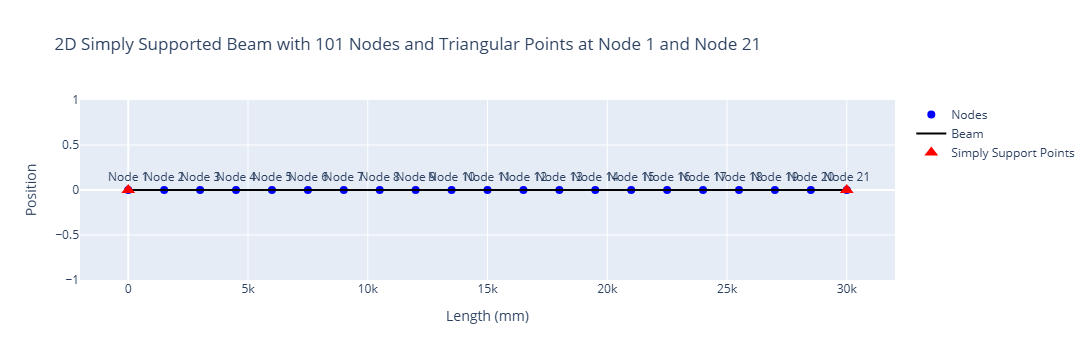

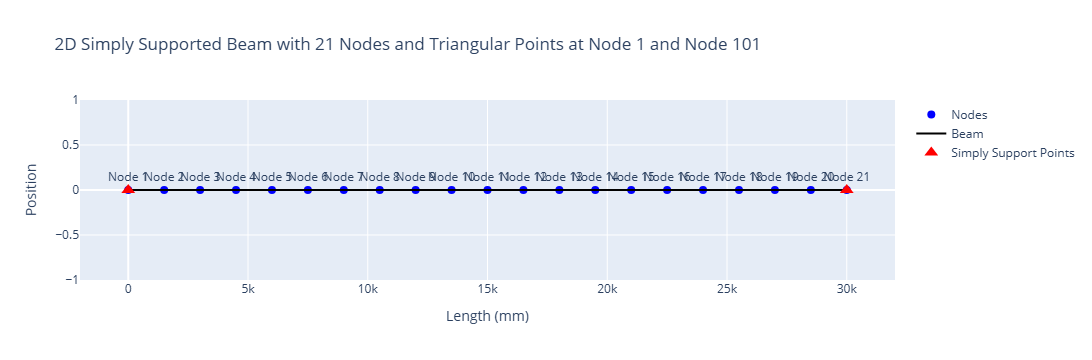

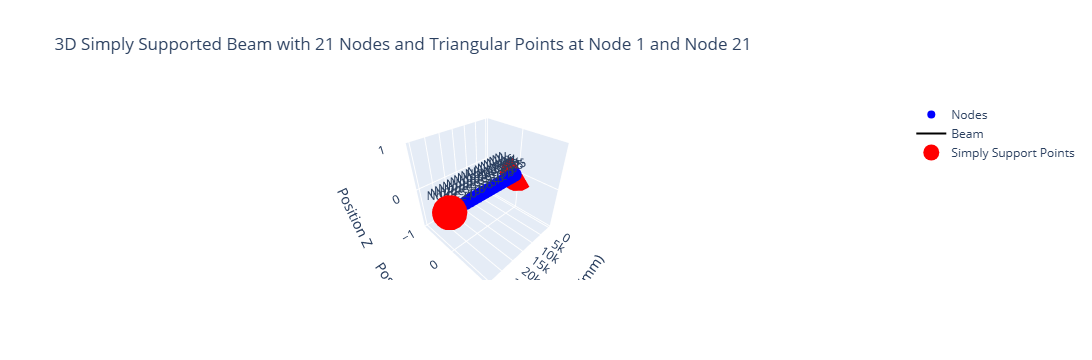

In [2]:
############################# 2D PLOT

# Number of nodes
num_nodes = 21
Length = 30000

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_2D_BEAM(x, y, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter(
        x=x, y=y,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter(
        x=[0, Length], y=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 101
    fig.add_trace(go.Scatter(
        x=[x[0], x[-1]], y=[y[0], y[-1]],
        mode='markers',
        marker=dict(size=12, symbol='triangle-up', color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        xaxis_title='Length (mm)',
        yaxis_title='Position',
        showlegend=True
    )

    # Show the plot
    fig.show()

PLOTLY_2D_BEAM(x, y, num_nodes, TITLE='2D Simply Supported Beam with 101 Nodes and Triangular Points at Node 1 and Node 21') 

############################# 3D PLOT

# Generate node positions
x = [(i-1) * Length / (num_nodes - 1) for i in range(1, num_nodes+1)]
y = [0] * num_nodes  # All nodes are on the x-axis
z = [0] * num_nodes  # All nodes are on the x-axis

def PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE):
    import plotly.graph_objects as go
    # Create the plot
    fig = go.Figure()

    # Add nodes to the plot
    fig.add_trace(go.Scatter3d(
        x=x, y=y, z=z,
        mode='markers+text',
        text=[f'Node {i}' for i in range(1, num_nodes+1)],
        textposition='top center',
        marker=dict(size=8, color='blue'),
        name='Nodes'
    ))

    # Add the beam line
    fig.add_trace(go.Scatter3d(
        x=[0, Length], y=[0, 0], z=[0, 0],
        mode='lines',
        line=dict(color='black', width=2),
        name='Beam'
    ))

    # Add triangular points at Node 1 and Node 21
    fig.add_trace(go.Scatter3d(
        x=[x[0], x[-1]], y=[y[0], y[-1]], z=[z[0], z[-1]],
        mode='markers',
        marker=dict(size=20, color='red'),
        name='Simply Support Points'
    ))

    # Update layout for better visualization
    fig.update_layout(
        title=TITLE,
        scene=dict(
            xaxis_title='Length (mm)',
            yaxis_title='Position Y',
            zaxis_title='Position Z'
        ),
        showlegend=True
    )

    # Show the plot
    fig.show()
#--------------------------------
PLOTLY_2D_BEAM(x, y, num_nodes, TITLE='2D Simply Supported Beam with 21 Nodes and Triangular Points at Node 1 and Node 101')     
PLOTLY_3D_BEAM(x, y, z, num_nodes, TITLE='3D Simply Supported Beam with 21 Nodes and Triangular Points at Node 1 and Node 21')

In [42]:
### --------------------------------------------------------
###   Composite Bridge Superstructure Movable Displacement
### --------------------------------------------------------


t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")

NUM_ITERATION = NUM_NODES
Tmax = 0.03 # Maximum Period 
Massef = Kef * (Tmax  / (2*np.pi))**2
PCol = Massef / NUM_NODES # Mass of each Node (Truss has 62 Nodes)
PColw = PCol * g # Weight of each Node
print(f'PERIOD: {Tmax:.4f} MASS: {PCol:.5f} WEIGHT: {PColw:.5f}')
for i in range(1, NUM_NODES):#NUM_NODES
    if i == 1 or i == NUM_NODES:
        q = 1
    else: 
        ND = i
        print('NODE: ', ND)
        PUSHOVER_ANALYSIS(Length, SideWalk_z, SideWalk_y, SideWalk_C, Deck_z, Deck_y,
                          Box_z, Box_y, tf01, bf, tf02, tw, Z1, Z2, cover,
                          H, DA01, DA02, DA03, PColw, ND, NUM_NODES, DMAX, i)
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(f"Current time (HH:MM:SS): {current_time}\n\n")        

Current time (HH:MM:SS): 08:37:54


PERIOD: 0.0300 MASS: 106.62075 WEIGHT: 1045949.53903
NODE:  2
Model Built
2 Pushover Done.
NODE:  3
Model Built
3 Pushover Done.
NODE:  4
Model Built
4 Pushover Done.
NODE:  5
Model Built
5 Pushover Done.
NODE:  6
Model Built
6 Pushover Done.
NODE:  7
Model Built
7 Pushover Done.
NODE:  8
Model Built
8 Pushover Done.
NODE:  9
Model Built
9 Pushover Done.
NODE:  10
Model Built
10 Pushover Done.
NODE:  11
Model Built
11 Pushover Done.
NODE:  12
Model Built
12 Pushover Done.
NODE:  13
Model Built
13 Pushover Done.
NODE:  14
Model Built
14 Pushover Done.
NODE:  15
Model Built
15 Pushover Done.
NODE:  16
Model Built
16 Pushover Done.
NODE:  17
Model Built
17 Pushover Done.
NODE:  18
Model Built
18 Pushover Done.
NODE:  19
Model Built
19 Pushover Done.
NODE:  20
Model Built
20 Pushover Done.
Current time (HH:MM:SS): 10:04:33




In [44]:
## FILE ADDRESS
DATA_FILE04 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_nodeDisplacements'  # NODE DISPLACEMENT - PUSH
DATA_FILE05 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_elementForces'  # ELEMENT FORCE - PUSH
DATA_FILE06 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\PUSH_fiber_StressStrain'  # SECTION STRAIN-STRESS - PUSH

DATA_FILE10 =f'C:\\OPENSEESPY_SALAR\\{FOLDER_NAME}\\DEF_PUSH'  # DEFORMATION TIME HISTORY - PUSH

In [45]:
### LOAD OUTPUT DATAS

import numpy as np

fiber_C_Strain01 = [] # Concrete Fiber Strain 01
fiber_C_Strain02 = [] # Concrete Fiber Strain 02
fiber_C_Strain03 = [] # Concrete Fiber Strain 03
fiber_C_Stress01 = [] # Concrete Fiber Stress 01
fiber_C_Stress02 = [] # Concrete Fiber Stress 02
fiber_C_Stress03 = [] # Concrete Fiber Stress 03

fiber_R_Strain01 = [] # Steel Rebar Fiber Strain 01
fiber_R_Strain02 = [] # Steel Rebar Fiber Strain 02
fiber_R_Strain03 = [] # Steel Rebar Fiber Strain 03
fiber_R_Strain04 = [] # Steel Rebar Fiber Strain 04
fiber_R_Strain05 = [] # Steel Rebar Fiber Strain 05
fiber_R_Stress01 = [] # Steel Rebar Fiber Stress 01
fiber_R_Stress02 = [] # Steel Rebar Fiber Stress 02
fiber_R_Stress03 = [] # Steel Rebar Fiber Stress 03
fiber_R_Stress04 = [] # Steel Rebar Fiber Stress 04
fiber_R_Stress05 = [] # Steel Rebar Fiber Stress 05

fiber_P_Strain01 = [] # Steel Plate Fiber Strain 01
fiber_P_Strain02 = [] # Steel Plate Fiber Strain 02
fiber_P_Stress01 = [] # Steel Plate Fiber Stress 01
fiber_P_Stress02 = [] # Steel Plate Fiber Stress 02

NodeJOINT = [] # Joint Counts
cur = [] # Curvature of Node 50
osf = [] # Over Strength Factor of Structure
dr = []  # Ductility Ratio of Structure
eei = [] # Elastic Flexural rigidity of Structure
pei = [] # Plastic Flexural rigidity of Structure
yd = [] # Yield Displacement of Structure
yb = [] # Yield Base-sheaer of Structure
ud = [] # Utilamte Displacement of Structure
ub = [] # Utilamte Base-sheaer of Structure
bs01 = [] # Base-sheaer Node 01
bs02 = [] # Base-sheaer Node 101




ysp_strain = 0.0018 # Yield strain - STEEL PLATE
usp_strain = 0.1  # Ultimate strain - STEEL PLATE

ys_strain = 0.02 # Yield strain - STEEL REBAR
us_strain = 0.1  # Ultimate strain - STEEL REBAR

yc_strain = 0.0002 # Yield strain - CONFINED CONCRETE
uc_strain = 0.008  # Ultimate strain -  CONFINED CONCRETE

#NUM_ITERATION = 10
for i in range(1, NUM_NODES):#NUM_NODES
    if i == 1 or i == NUM_NODES:
        q = 1
    else: 
        ND = i
        print('NODE: ', ND)
        dispP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i, 2) # Reading Disp from Text file - PUSHOVER
        base01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 1
        base02 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i, 2) # Reading base shear from Text file - PUSHOVER - NODE 101
        dispP = np.abs(dispP); baseP = np.abs(base01 + base02); # ABSOLUTE VALUE
        xx, yy, Elastic_EI, Plastic_EI, Tangent_EI, Ductility_Rito, Over_Stregth_Factor = BILNEAR_CURVE(dispP, baseP, 5)
        xx = np.abs(xx); yy = np.abs(yy) # ABSOLUTE VALUE
        bs01.append(max(abs(base01)))
        bs02.append(max(abs(base02)))
        osf.append(Over_Stregth_Factor)
        dr.append(Ductility_Rito)
        pei.append(Plastic_EI)
        eei.append(Elastic_EI)
        yd.append(xx[1])
        yb.append(yy[1])
        ud.append(xx[2])
        ub.append(yy[2])
        # CONCRETE
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_01', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_01', 0, i, 2)))
        fiber_C_Strain01.append(STRAIN)
        fiber_C_Stress01.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_02', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_02', 0, i, 2)))
        fiber_C_Strain02.append(STRAIN)
        fiber_C_Stress02.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_03', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberCon_StressStrain_03', 0, i, 2)))
        fiber_C_Strain03.append(STRAIN)
        fiber_C_Stress03.append(STRESS)
        # STEEL REBAR
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_01', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_01', 0, i, 2)))
        fiber_R_Strain01.append(STRAIN)
        fiber_R_Stress01.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_02', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_02', 0, i, 2)))
        fiber_R_Strain02.append(STRAIN)
        fiber_R_Stress02.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_03', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_03', 0, i, 2)))
        fiber_R_Strain03.append(STRAIN)
        fiber_R_Stress03.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_04', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_04', 0, i, 2)))
        fiber_R_Strain04.append(STRAIN)
        fiber_R_Stress04.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_05', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberReb_StressStrain_05', 0, i, 2)))
        fiber_R_Strain05.append(STRAIN)
        fiber_R_Stress05.append(STRESS)
        # STEEL PLATE
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberPlate_StressStrain_01', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberPlate_StressStrain_01', 0, i, 2)))
        fiber_P_Strain01.append(STRAIN)
        fiber_P_Stress01.append(STRESS)
        STRAIN = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberPlate_StressStrain_02', 1, i, 2)))
        STRESS = max(abs(OUTPUT_SECOND_COLUMN(FOLDER_NAME,'PUSH_fiberPlate_StressStrain_02', 0, i, 2)))
        fiber_P_Strain02.append(STRAIN)
        fiber_P_Stress02.append(STRESS)
        NodeJOINT.append(ND)

NODE:  2
NODE:  3
NODE:  4
NODE:  5
NODE:  6
NODE:  7
NODE:  8
NODE:  9
NODE:  10
NODE:  11
NODE:  12
NODE:  13
NODE:  14
NODE:  15
NODE:  16
NODE:  17
NODE:  18
NODE:  19
NODE:  20


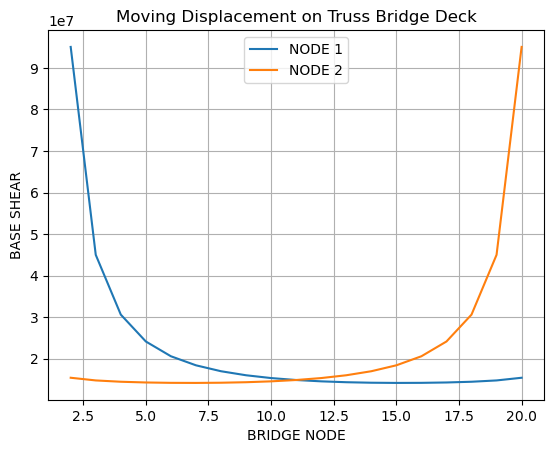

In [46]:
# Data usage
x = NodeJOINT
y_list = [
    bs01,
    bs02
]

XLABEL = 'BRIDGE NODE'
YLABEL = 'BASE SHEAR'
TITLE = 'Moving Displacement on Truss Bridge Deck'
LABELS = ['NODE 1', 'NODE 2', 'NODE 3','NODE 4']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

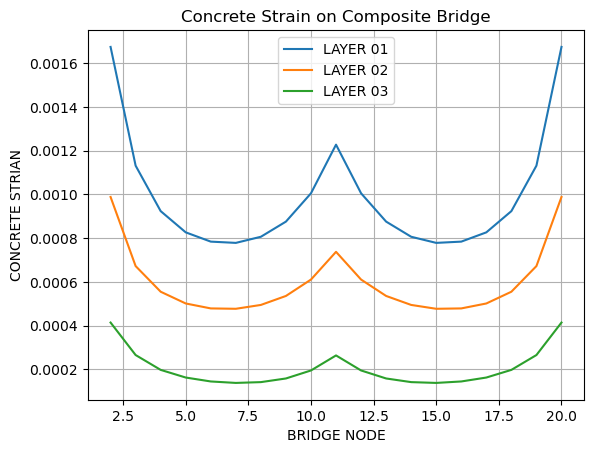

In [48]:
# Data usage
x = NodeJOINT
y_list = [
    fiber_C_Strain01,
    fiber_C_Strain02,
    fiber_C_Strain03,

]

XLABEL = 'BRIDGE NODE'
YLABEL = 'CONCRETE STRIAN'
TITLE = 'Concrete Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

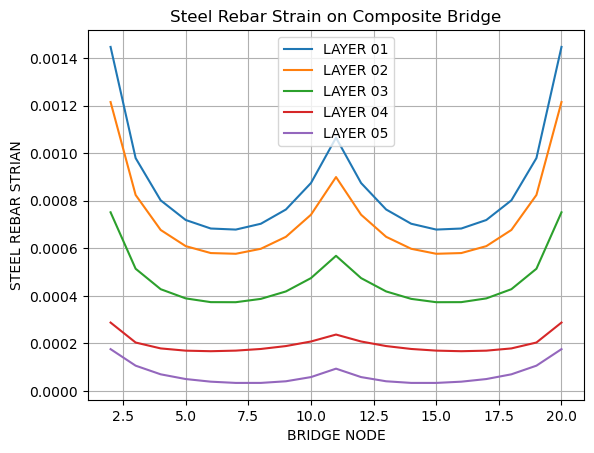

In [49]:
# Data usage
x = NodeJOINT
y_list = [
    fiber_R_Strain01,
    fiber_R_Strain02,
    fiber_R_Strain03,
    fiber_R_Strain04,
    fiber_R_Strain05,

]

XLABEL = 'BRIDGE NODE'
YLABEL = 'STEEL REBAR STRIAN'
TITLE = 'Steel Rebar Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02','LAYER 03', 'LAYER 04', 'LAYER 05']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

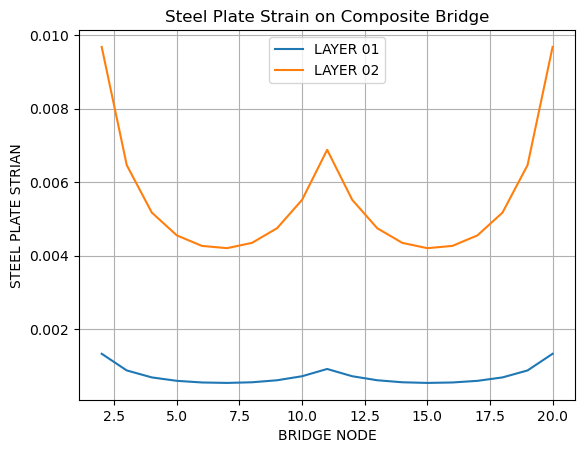

In [50]:
# Data usage
x = NodeJOINT
y_list = [
    fiber_P_Strain01,
    fiber_P_Strain02,
]

XLABEL = 'BRIDGE NODE'
YLABEL = 'STEEL PLATE STRIAN'
TITLE = 'Steel Plate Strain on Composite Bridge'
LABELS = ['LAYER 01', 'LAYER 02']
plot_multiple_lines(x, y_list, LABELS, XLABEL, YLABEL, TITLE)

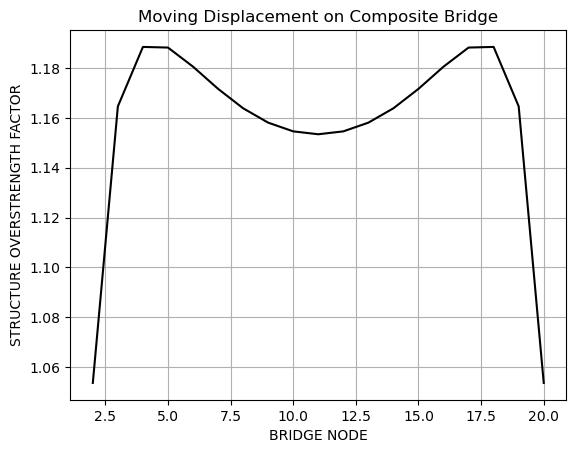

In [51]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'STRUCTURE OVERSTRENGTH FACTOR'
TITLE = 'Moving Displacement on Composite Bridge'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, osf, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

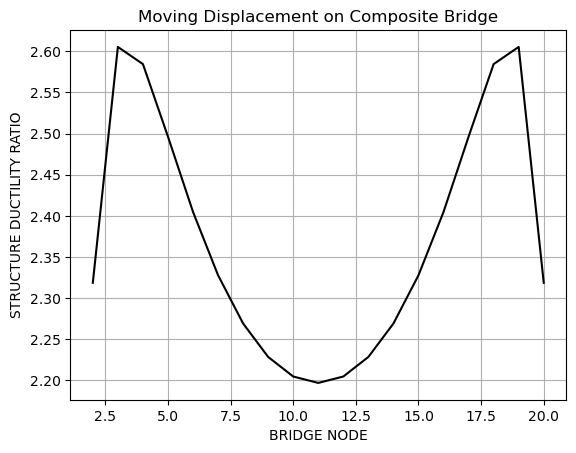

In [52]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'STRUCTURE DUCTILITY RATIO'
TITLE = 'Moving Displacement on Composite Bridge'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, dr, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

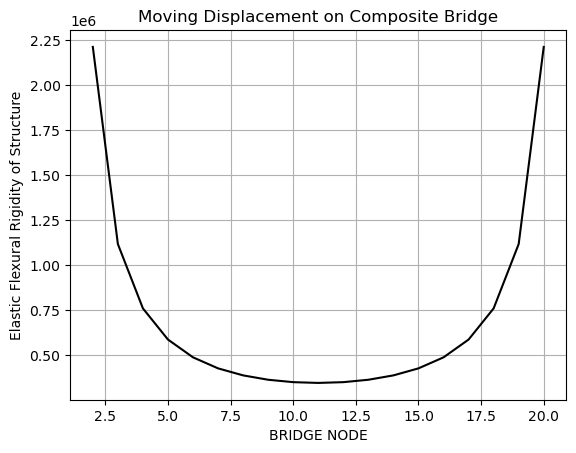

In [53]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Elastic Flexural Rigidity of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, eei, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

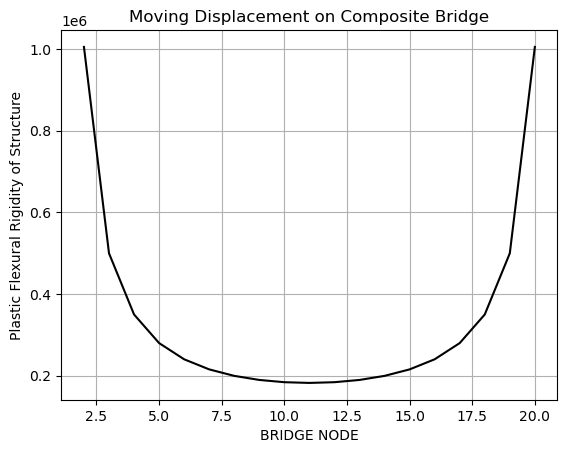

In [54]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Plastic Flexural Rigidity of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
COLOR = 'black'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, pei, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

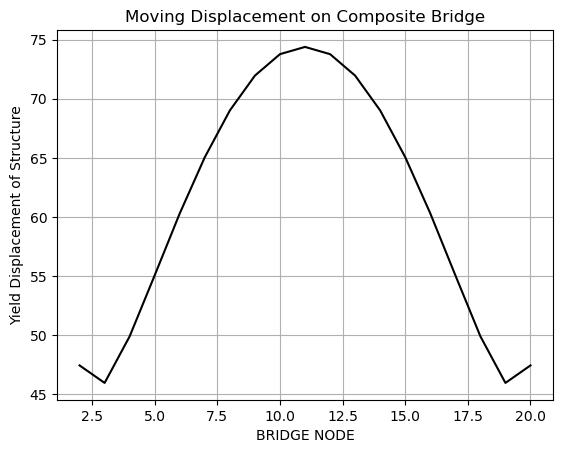

In [55]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Yield Displacement of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
COLOR = 'black'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, yd, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

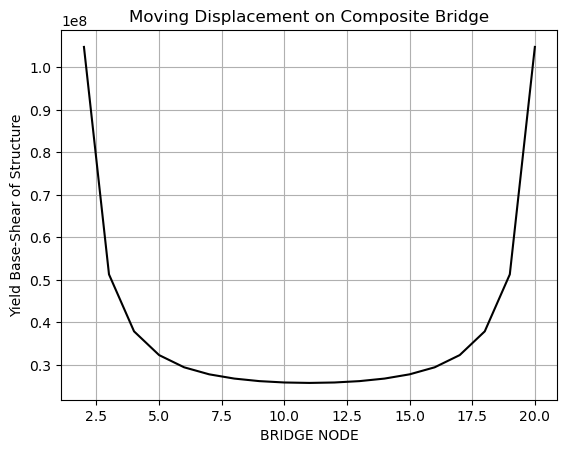

In [56]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Yield Base-Shear of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
COLOR = 'black'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, yb, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

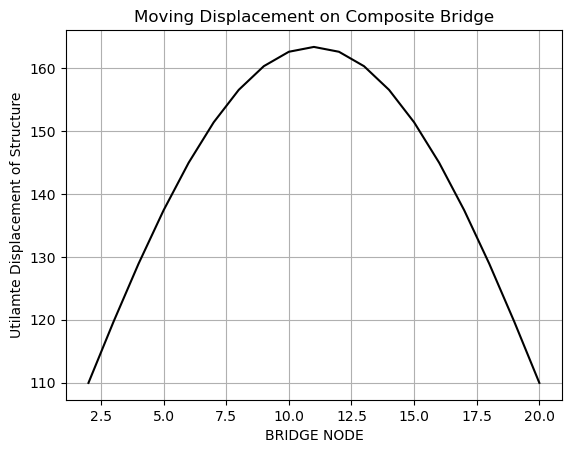

In [57]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Utilamte Displacement of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
COLOR = 'black'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, ud, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

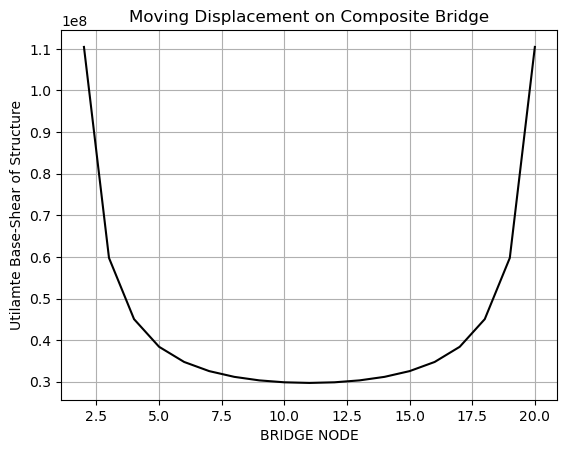

In [58]:
XLABEL = 'BRIDGE NODE'
YLABEL = 'Utilamte Base-Shear of Structure'
TITLE = 'Moving Displacement on Composite Bridge'
COLOR = 'black'
LEGEND01 = ''
LEGEND02 = ''
LEGEND03 = ''
PLOT_2D(NodeJOINT, ub, _, _, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=1)

In [59]:
### LAST LOAD DATA
import numpy as np
## PYSHOVER ANALYSIS DATA
# Displacement Time History
DTHP = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'DTH_PUSH', 2, i-1, 2)
# Base Shear Time History 01
BTH01 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_01', 2, i-1, 2)
# Base Shear Time History 101
BTH0101 = OUTPUT_SECOND_COLUMN(FOLDER_NAME,'BTH_PUSH_101', 2, i-1, 2)

BTHP = abs(BTH01 + BTH0101)

print(len(DTHP), len(BTHP))

1010 1010


1010
1161037.8155892838


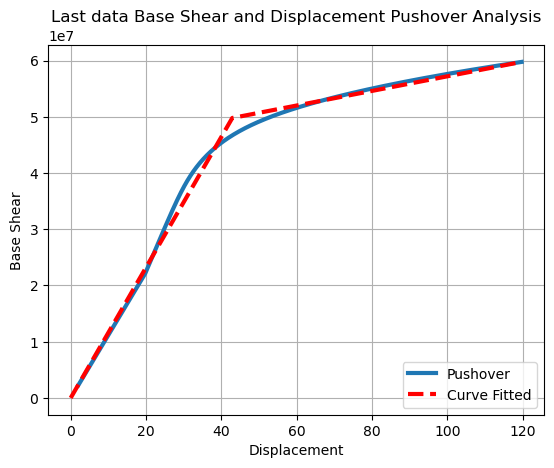

In [60]:
print(len(BTHP))
xx, yy, _, _, _, _, _ = BILNEAR_CURVE(abs(DTHP), abs(BTHP), 30)
print(yy[1]/ xx[1])
#demand_disp = MAXABS_FUN(DATA_FILE01, 1, i)# DEMAND DYNAMIC DISPLACEMENT
XLABEL = 'Displacement'
YLABEL = 'Base Shear'
TITLE = 'Last data Base Shear and Displacement Pushover Analysis'
COLOR = 'black'
LEGEND01 = 'Pushover'
LEGEND02 = 'Curve Fitted'
LEGEND03 = ''
PLOT_2D(abs(DTHP), abs(BTHP), xx, yy, _, _, XLABEL, YLABEL, TITLE, LEGEND01, LEGEND02, LEGEND03, COLOR, Z=2)